---
# Data Analysis and Machine Learning
---
## Assessment 02

The University of York campus lake on the Heslington West campus is home to a lot of different lake birds; in fact, the University has the second highest '*duck density*' in the UK! All University of York students are able to recognise the ducks, geese, and swans that they see around the lake - but is a computer able to, or is it what separates us from machines?

Your dataset is packaged as a .zip archive (which you will need to download and unpack) and contains colour (RGB) images (***X***) of ducks, geese, and swans (*y*). Inside the .zip archive (`lake_bird_images.zip`), there are two subdirectories: `train` and `test`, containing the training and testing datasets, respectively. Inside each of these subdirectories are three further subdirectories: `duck`, `goose`, and `swan`. There are 498 images of ducks, 981 images of geese, and 335 images of swans inside `train` (1814 images in total), and there are 218 images of ducks, 405 images of geese, and 160 images of swans inside `test` (783 images in total).

Your task is to build one deep machine-learning model:
- a **multiclass classification model for predicting whether the image is a duck, a goose, or a swan**. You are only allowed to evaluate your model performance on the test dataset (`test`) once; all model (hyperparameter) tuning should be carried out using only the training dataset (`train`) and a validation set derived from it.

This assessment also has a written/report-style component which you can complete inside this notebook by adding additional text blocks if necessary. Once you have built your deep machine-learning model, you should:
- evaluate its performance, **producing at least three figures that illustrate the performance of the model**, and **write an analysis of each figure that outlines what the figure is showing and what it tells you about the performance of your model**. You are not limited to only three figures - you can produce more figures if they are useful in illustrating a point - although only three figures and accompanying analyses will count towards your grade on the assessment (these will be the highest-graded three that you present). The figures and accompanying analuses can focus on the training/validation performance, the testing performance, or - ideally - a mixture of the two;
- answer the question: **what limits the performance of the model?** Up to three proposed explanations will count towards your grade on the assessment.

You are limited to 2500 words for your written/report-style contribution, but this is **not** a guideline - it is likely much, much more than what you'll need, and contributions of this length are not expected.

All code should generally be commented where appropriate as good practice dictates. When you have finished, use the option on the File menu to download this notebook as in .ipynb format and upload it to the submission point on the VLE.

## Tips:

- If you cannot get code to work, comment it out and write comments about what you are trying to do and how it fails.
- Consider running your code locally on your computer or on a University-managed computer rather than Google Colab to avoid uploading the duck/goose/swan dataset to your Google Drive; the dataset contains around 2500 images and will not only be slow to upload but also slow to access for your deep machine-learning model. Your code will run much, much quicker if you run it offline!
- Don't expect the kind of accuracy that you were able to acheive in the last assessment (DAML Assessment 01); this is a much, much more challenging problem! Think, instead, about the baseline accuracy that you might expect for a multiclass classification task like this.
- Familiarise yourself with the new TensorFlow notebooks on deep neural networks (DNNs) and deep convolutional neural networks (CNNs) before you attempt the task.

Before you start, click the &#x25B8; icon below to allow colab to access the data files in your drive (not necessary if you plan to work offline).

... and click the &#x25B8; icon below to import the `numpy`, `matplotlib.pyplot` libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

You can click the &#x25B8; icon below to install TensorFlow if the environment/computer you're working on doesn't have TensorFlow installed already:

In [3]:
# ! pip install tensorflow

...and click the &#x25B8; icon below to import the `tensorflow` and `tensorflow.keras` libraries:

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import callbacks

### Task 01

Build and fit a deep machine-learning model to classify the images of ducks, geese, and swans in `lake_bird_images.zip`. Evaluate your multiclass classification model using the accuracy, and optimise the hyperparameters of your multiclass classification model to obtain the best performance possible on unseen data using the images in `train`. When you are satisified - **and only once in the notebook** - evaluate and/or produce predictions for the images in `test`.

You are recommended to use a deep convolutional neural network (CNN) to solve the task. Show evidence that you have:

- experimented with the structure and number of the layers (*e.g.* `layers.Conv2D`, `layers.MaxPooling2D`) in your CNN;
- experimented with the addition of other kinds of layers (*e.g.* for data augmentation, and/or regularisation \[`layers.Dropout`, `layers.BatchNormalzation`\]);
- evaluated your chosen multiclass classification model on held-out data.

In [5]:
## TODO:
# build and fit a deep machine-learning model to classify the images of ducks,
# geese, and swans in `lake_bird_images.zip`

In [6]:
# 数据路径
train_data_dir = 'lake_bird_images/train' 
test_data_dir = 'lake_bird_images/test'   
'''
# 数据生成器
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
'''


'\n# 数据生成器\ntrain_datagen = ImageDataGenerator(rescale=1./255)\ntest_datagen = ImageDataGenerator(rescale=1./255)\n'

In [7]:
train_dataset, valid_dataset = utils.image_dataset_from_directory(
    train_data_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    image_size = (128, 128),
    batch_size = 32,
    shuffle = True,
    validation_split = 0.2,
    subset = 'both',
    seed = 0
)

Found 1814 files belonging to 3 classes.
Using 1452 files for training.
Using 362 files for validation.


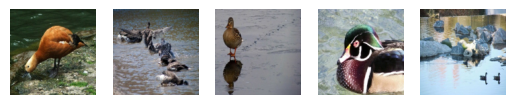

In [8]:
fig, axs = plt.subplots(1, 5)

i = 0
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        if i >= 5:
            break
        if y[0] == 1:
            axs[i].imshow(x.astype(int))
            axs[i].set_axis_off()
            i += 1

In [9]:
def build_model() -> models.Sequential:

    # TODO: complete this function; create a keras.models.Sequential() model, `model`,
    # and add some layers and then compile the model; return `model` once complete
    model = models.Sequential()
    model.add(layers.Normalization(input_shape = (128, 128, 3)))
    model.add(layers.Conv2D(8, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation = 'relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation = 'relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(3, activation = 'softmax'))

    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )

    return model

model = build_model()
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 128, 128, 3)       7         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 8)       224       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 8)       32        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 126, 126, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 8)         0         
 D)                                                              
                                                     

In [10]:
from PIL import Image

# 训练模型
history = model.fit(
    train_dataset,
    epochs=10,  # 可以根据需要调整周期数
    validation_data=valid_dataset
)


Epoch 1/10




46/46 [==============================] - 6s 84ms/step - loss: 1.8118 - accuracy: 0.4277 - val_loss: 1.0417 - val_accuracy: 0.5580
Epoch 2/10
46/46 [==============================] - 3s 69ms/step - loss: 1.2322 - accuracy: 0.4704 - val_loss: 1.0138 - val_accuracy: 0.5387
Epoch 3/10
46/46 [==============================] - 3s 69ms/step - loss: 1.1163 - accuracy: 0.5069 - val_loss: 0.9745 - val_accuracy: 0.5580
Epoch 4/10
46/46 [==============================] - 3s 68ms/step - loss: 1.0429 - accuracy: 0.5234 - val_loss: 0.9610 - val_accuracy: 0.5580
Epoch 5/10
46/46 [==============================] - 3s 70ms/step - loss: 1.0079 - accuracy: 0.5640 - val_loss: 0.9763 - val_accuracy: 0.5525
Epoch 6/10
46/46 [==============================] - 3s 66ms/step - loss: 0.9478 - accuracy: 0.5764 - val_loss: 0.9526 - val_accuracy: 0.5773
Epoch 7/10
46/46 [==============================] - 3s 66ms/step - loss: 0.9035 - accuracy: 0.5882 - val_loss: 0.9074 - val_accuracy: 0.5967
Epoch 8/10
46/46 [====

In [11]:
# TODO: evaluate `model`
test_loss, test_accuracy = model.evaluate(valid_dataset)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {(test_accuracy * 100.0):.1f}%')

12/12 [==============================] - 0s 16ms/step - loss: 0.9973 - accuracy: 0.5994
Test Loss: 0.9973
Test Accuracy: 59.9%


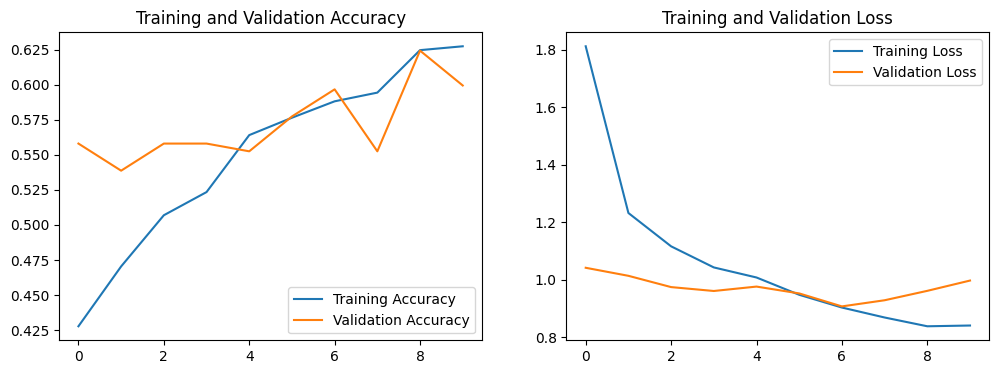

In [13]:
import matplotlib.pyplot as plt

# 绘制训练过程中的损失和准确率
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [14]:
## TODO:
# plot a figure that illustrates the performance of your deep machine-learning
# model, eg. a confusion matrix, a hyperparameter optimisation curve, a training/
# validation loss curve, a learning curve, etc.

**TODO:** Write an analysis of the figure above here; what does the figure show, and what does the figure indicate about the performance of your model?

In [15]:
## TODO:
# plot a figure that illustrates the performance of your deep machine-learning
# model, eg. a confusion matrix, a hyperparameter optimisation curve, a training/
# validation loss curve, a learning curve, etc.

**TODO:** Write an analysis of the figure above here; what does the figure show, and what does the figure indicate about the performance of your model?

In [16]:
## TODO:
# plot a figure that illustrates the performance of your deep machine-learning
# model, eg. a confusion matrix, a hyperparameter optimisation curve, a training/
# validation loss curve, a learning curve, etc.

**TODO:** Write an analysis of the figure above here; what does the figure show, and what does the figure indicate about the performance of your model?

**TODO:** What limits the performance of your model? Discuss here, giving up to three possible explanations and (if useful) referring back to your figures.